In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, MAT, LinearAlgebra, MAT #Revise
using Flatten

In [3]:
using PyPlot

In [4]:
x_joint = Vector(undef, 3);
H_joint = Vector(undef, 3);
CIs_joint = Vector(undef, 3);

In [5]:
x_choice = Vector(undef, 3);
H_choice = Vector(undef, 3);
CIs_choice = Vector(undef, 3);

In [6]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt = 1e-2
n, cross = 53, false
path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/data/hanks_data_sessions_augmented"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/data/hanks_data_sessions_augmented"

In [7]:
save_path = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/joint/paper"

"/usr/people/briandd/Projects/briandepasquale/bdd_work/analysis/joint/paper"

## PPC

In [8]:
region, delay = "PPC", 12
ratnum = 6:8
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

In [9]:
data_PPC, μ_rnt, μ_t, cpoke_out_PPC = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [10]:
file = joinpath(save_path, "PPC_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];  

In [11]:
x_joint[2] = xf;

In [12]:
joint_model_PPC = neural_choiceDDM(θneural_choice(xf, f), data_PPC, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}, Vector{Vector{neuraldata}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  data: Array{Vector{neuraldata}}((24,))
  n: Int64 53
  cross: Bool false


In [13]:
save_path_choice = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/choice/by_region_small"
file = joinpath(save_path_choice, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [14]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_PPC...), :input_data));
choice_data_PPC = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_PPC...), :choice));
choice_model_PPC = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[2]), data=choice_data_PPC, n=n, cross=cross);

## STR

In [15]:
region, delay = "STR", 6
ratnum = 9:11
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_STR,μ_rnt, μ_t, cpoke_out_STR = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [16]:
file = joinpath(save_path, "STR_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   

In [17]:
x_joint[3] = xf;

In [18]:
joint_model_STR = neural_choiceDDM(θneural_choice(xf, f), data_STR, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}, Vector{Vector{neuraldata}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  data: Array{Vector{neuraldata}}((27,))
  n: Int64 53
  cross: Bool false


In [19]:
save_path_choice = ENV["HOME"]*"/Projects/briandepasquale/bdd_work/analysis/choice/by_region_small"
file = joinpath(save_path_choice, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [20]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_STR...), :input_data));
choice_data_STR = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_STR...), :choice));

In [21]:
choice_model_STR = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[3]), data=choice_data_STR, n=n, cross=cross);

## FOF

In [22]:
region, delay = "FOF", 6
ratnum = 1:5
rat = ratnames[ratnum]

sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(path)), rat)...);

data_FOF,μ_rnt, μ_t, cpoke_out_FOF = load_neural_data(joinpath.(path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

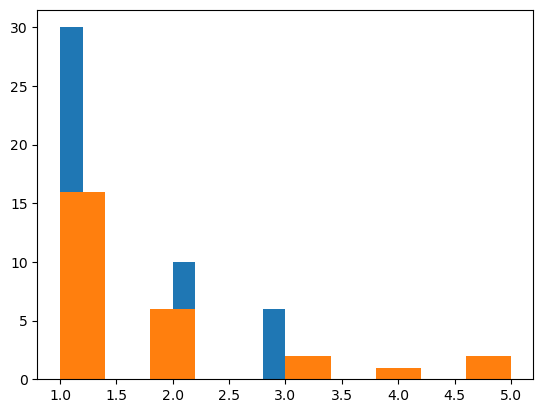

In [23]:
hist(map(x-> x[1].ncells, data_FOF));
hist(map(x-> x[1].ncells, data_STR));

In [24]:
sum(map(x-> x[1].ncells, data_FOF) .== 1)/length(data_FOF)

0.6521739130434783

In [25]:
(sum(map(x-> x[1].ncells, data_STR) .== 1) + 2)/length(data_STR)

0.6666666666666666

In [26]:
file = joinpath(save_path, "FOF_regular-contd-FINAL.mat")

f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")

borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   

In [27]:
x_joint[1] = xf;

In [28]:
joint_model_FOF = neural_choiceDDM(θneural_choice(xf, f), data_FOF, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}, Vector{Vector{neuraldata}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  data: Array{Vector{neuraldata}}((46,))
  n: Int64 53
  cross: Bool false


In [29]:
file = joinpath(save_path_choice, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [30]:
choice_inputs = map(x-> pulse_input_DDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_FOF...), :input_data));
choice_data_FOF = pulse_input_DDM.choicedata.(choice_inputs, getfield.(vcat(data_FOF...), :choice));

In [31]:
choice_model_FOF = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[1]), data=choice_data_FOF, n=n, cross=cross);

In [32]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_FOF.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_FOF = cumsum.(-L .+ R);

In [33]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_PPC.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_PPC = cumsum.(-L .+ R);

In [34]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_STR.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_STR = cumsum.(-L .+ R);

## Forward pass and posteriors

In [35]:
import pulse_input_DDM: forward
import pulse_input_DDM: posterior

In [36]:
output = forward(choice_model_FOF);
choice_a_FOF = map(x-> x[1], output);
xc_choice_FOF = output[1][2];

In [37]:
output = forward(choice_model_PPC);
choice_a_PPC = map(x-> x[1], output);
xc_choice_PPC = output[1][2];

In [38]:
output = forward(choice_model_STR);
choice_a_STR = map(x-> x[1], output);
xc_choice_STR = output[1][2];

In [39]:
neural_model_FOF = neuralDDM(θ=θneural(θz=joint_model_FOF.θ.θz, θy=joint_model_FOF.θ.θy, f=joint_model_FOF.θ.f),
    data=joint_model_FOF.data, n=joint_model_FOF.n, cross=joint_model_FOF.cross);

In [40]:
neural_model_PPC = neuralDDM(θ=θneural(θz=joint_model_PPC.θ.θz, θy=joint_model_PPC.θ.θy, f=joint_model_PPC.θ.f),
    data=joint_model_PPC.data, n=joint_model_PPC.n, cross=joint_model_PPC.cross);

In [41]:
neural_model_STR = neuralDDM(θ=θneural(θz=joint_model_STR.θ.θz, θy=joint_model_STR.θ.θy, f=joint_model_STR.θ.f),
    data=joint_model_STR.data, n=joint_model_STR.n, cross=joint_model_STR.cross);

In [42]:
output = posterior(neural_model_FOF);
output = vcat(output...);
neural_post_FOF = map(x-> x[1] .* x[2], output);
xc_neural_FOF = output[1][3];

In [43]:
output = posterior(neural_model_PPC);
output = vcat(output...);
neural_post_PPC = map(x-> x[1] .* x[2], output);
xc_neural_PPC = output[1][3];

In [44]:
output = posterior(neural_model_STR);
output = vcat(output...);
neural_post_STR = map(x-> x[1] .* x[2], output);
xc_neural_STR = output[1][3];

#### Expected values

In [45]:
exp_PPC_neural = map(x-> x[:,33:end-8]' * xc_neural_PPC, neural_post_PPC);
exp_FOF_neural = map(x-> x[:,27:end-14]' * xc_neural_FOF, neural_post_FOF);
exp_STR_neural = map(x-> x[:,27:end-14]' * xc_neural_STR, neural_post_STR);

In [46]:
exp_PPC_choice_for = map(x-> x' * xc_choice_PPC, choice_a_PPC);
exp_FOF_choice_for = map(x-> x' * xc_choice_FOF, choice_a_FOF);
exp_STR_choice_for = map(x-> x' * xc_choice_STR, choice_a_STR);

In [47]:
import Statistics: median

## Find change of mind

In [48]:
# compute the diff of the thresholded expected posterior

In [49]:
diff_choice_STR = map(x-> diff(x .< choice_model_STR.θ.bias), exp_STR_choice_for);
diff_neural_STR = map(x-> diff(x .< joint_model_STR.θ.bias), exp_STR_neural);
diff_LR_STR = map(x-> diff(x .< 0.), ΔLR_STR);

diff_choice_FOF = map(x-> diff(x .< choice_model_FOF.θ.bias), exp_FOF_choice_for);
diff_LR_FOF = map(x-> diff(x .< 0.), ΔLR_FOF);
diff_neural_FOF = map(x-> diff(x .< joint_model_FOF.θ.bias), exp_FOF_neural);

diff_choice_PPC = map(x-> diff(x .< choice_model_PPC.θ.bias), exp_PPC_choice_for);
diff_LR_PPC = map(x-> diff(x .< 0.), ΔLR_PPC);
diff_neural_PPC = map(x-> diff(x .< joint_model_PPC.θ.bias), exp_PPC_neural);

In [50]:
# find the zero crossings

In [51]:
find_diff_choice_PPC = map(x-> findall(x .!= 0), diff_choice_PPC);
find_diff_choice_STR = map(x-> findall(x .!= 0), diff_choice_STR);
find_diff_choice_FOF = map(x-> findall(x .!= 0), diff_choice_FOF);

find_diff_LR_PPC = map(x-> findall(x .!= 0), diff_LR_PPC);
find_diff_LR_STR = map(x-> findall(x .!= 0), diff_LR_STR);
find_diff_LR_FOF = map(x-> findall(x .!= 0), diff_LR_FOF);

find_diff_neural_PPC = map(x-> findall(x .!= 0), diff_neural_PPC);
find_diff_neural_STR = map(x-> findall(x .!= 0), diff_neural_STR);
find_diff_neural_FOF = map(x-> findall(x .!= 0), diff_neural_FOF);

In [52]:
# find the trials which have zero crossings (putative events)

In [53]:
which_trials_PPC_LR = findall(length.(find_diff_LR_PPC) .!= 0);
which_trials_FOF_LR = findall(length.(find_diff_LR_FOF) .!= 0);
which_trials_STR_LR = findall(length.(find_diff_LR_STR) .!= 0);

In [54]:
which_trials_PPC_neural = findall(length.(find_diff_neural_PPC) .!= 0);
which_trials_FOF_neural = findall(length.(find_diff_neural_FOF) .!= 0);
which_trials_STR_neural = findall(length.(find_diff_neural_STR) .!= 0);

In [55]:
which_trials_PPC_choice = findall(length.(find_diff_choice_PPC) .!= 0);
which_trials_FOF_choice = findall(length.(find_diff_choice_FOF) .!= 0);
which_trials_STR_choice = findall(length.(find_diff_choice_STR) .!= 0);

In [56]:
function CoM(x, t, thresh, margin)
    
    isevent = false
    go = true
    tprime = 5
    y = []
    
    while go
                
        if ((t - tprime) >= 1) & ((t + tprime) <= length(x))
        
            y = x[t - tprime : t + tprime]

            if (x[t - 1] < thresh) & (x[t + 1] > thresh)
                
                if all(x[t - tprime : t - 1] .< thresh) & all(x[t + 1 : t + tprime] .> thresh)
                    if any(x[t - tprime : t - 1] .< (thresh - margin)) & any(x[t + 1 : t + tprime] .> (thresh + margin))
                        isevent = true
                        go = false
                    else
                        tprime = tprime + 1
                    end
                else
                    isevent = false
                    go = false
                end
                
            elseif (x[t - 1] > thresh) & (x[t + 1] < thresh)
                
                if all(x[t - tprime : t - 1] .> thresh) & all(x[t + 1 : t + tprime] .< thresh)
                    if any(x[t - tprime : t - 1] .> (thresh + margin)) & any(x[t + 1 : t + tprime] .< (thresh - margin))
                        isevent = true
                        go = false
                    else
                        tprime = tprime + 1
                    end
                else
                    isevent = false
                    go = false
                end
            else
                tprime = tprime + 1
            end
            
        else
            
            isevent = false
            go = false
            
        end
        
    end
    
    return y, tprime, go, isevent
end

CoM (generic function with 1 method)

In [57]:
# use a more conservative threshold to find the events

In [58]:
#y, tprime, go, isevent = CoM(exp_PPC_neural[which_trials_PPC_neural[1]], 
#    find_diff_neural_PPC[which_trials_PPC_neural[1]][1], 
#    joint_model_PPC.θ.bias)

In [59]:
thresh = joint_model_PPC.θ.bias
margin = 2
x = exp_PPC_neural
which_trials = which_trials_PPC_neural
events = find_diff_neural_PPC;

In [60]:
output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

In [61]:
#tprime = getindex.(output, 2)
#go = getindex.(output, 3)
y_PPC_neural = map(x-> getindex.(x, 1), output)
isevent_PPC_neural = map(x-> getindex.(x, 4), output);

In [62]:
sum(vcat(isevent_PPC_neural...))/length(exp_PPC_neural)

0.056324001327874296

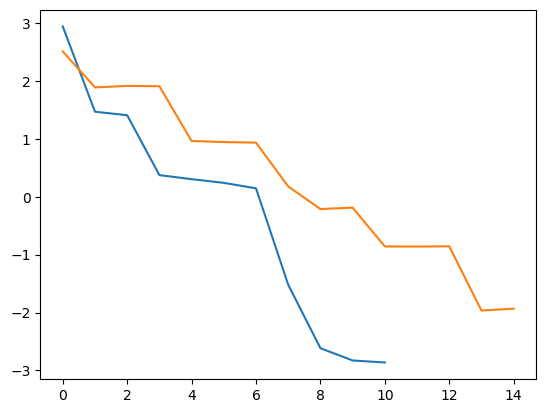

In [63]:
plot.(vcat(y_PPC_neural...)[vcat(isevent_PPC_neural...)][1:2]);

In [64]:
thresh = joint_model_STR.θ.bias
margin = 2
x = exp_STR_neural
which_trials = which_trials_STR_neural
events = find_diff_neural_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

In [65]:
y_STR_neural = map(x-> getindex.(x, 1), output)
isevent_STR_neural = map(x-> getindex.(x, 4), output);

In [66]:
sum(vcat(isevent_STR_neural...))/length(exp_STR_neural)

0.1283457249070632

In [67]:
thresh = joint_model_FOF.θ.bias
margin = 2
x = exp_FOF_neural
which_trials = which_trials_FOF_neural
events = find_diff_neural_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_neural = map(x-> getindex.(x, 1), output)
isevent_FOF_neural = map(x-> getindex.(x, 4), output)

sum(vcat(isevent_FOF_neural...))/length(exp_FOF_neural)

0.01277183293061788

In [68]:
thresh = choice_model_FOF.θ.bias
margin = 2
x = exp_FOF_choice_for
which_trials = which_trials_FOF_choice
events = find_diff_choice_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_choice = map(x-> getindex.(x, 1), output)
isevent_FOF_choice = map(x-> getindex.(x, 4), output);

In [69]:
sum(vcat(isevent_FOF_choice...))/length(exp_FOF_choice_for)

0.0011506155793349442

In [70]:
thresh = choice_model_PPC.θ.bias
margin = 2
x = exp_PPC_choice_for
which_trials = which_trials_PPC_choice
events = find_diff_choice_PPC;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_PPC_choice = map(x-> getindex.(x, 1), output)
isevent_PPC_choice = map(x-> getindex.(x, 4), output);

sum(vcat(isevent_PPC_choice...))/length(exp_PPC_choice_for)

0.003762310501272546

In [71]:
thresh = choice_model_STR.θ.bias
margin = 2
x = exp_STR_choice_for
which_trials = which_trials_STR_choice
events = find_diff_choice_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_STR_choice = map(x-> getindex.(x, 1), output)
isevent_STR_choice = map(x-> getindex.(x, 4), output);

sum(vcat(isevent_STR_choice...))/length(exp_STR_choice_for)

0.0005576208178438662

In [72]:
thresh = 0
margin = 2
x = ΔLR_FOF
which_trials = which_trials_FOF_LR
events = find_diff_LR_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_LR = map(x-> getindex.(x, 1), output)
isevent_FOF_LR = map(x-> getindex.(x, 4), output);

In [73]:
thresh = 0
margin = 2
x = ΔLR_PPC
which_trials = which_trials_PPC_LR
events = find_diff_LR_PPC;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_PPC_LR = map(x-> getindex.(x, 1), output)
isevent_PPC_LR = map(x-> getindex.(x, 4), output);

In [74]:
thresh = 0
margin = 2
x = ΔLR_STR
which_trials = which_trials_STR_LR
events = find_diff_LR_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_STR_LR = map(x-> getindex.(x, 1), output)
isevent_STR_LR = map(x-> getindex.(x, 4), output);

In [75]:
selected_neural_events_FOF = getindex(find_diff_neural_FOF, which_trials_FOF_neural);

In [76]:
#selected_neural_events_FOF = getindex(find_diff_neural_FOF, which_trials_FOF_neural)[any.(isevent_FOF_neural)];
#selected_neural_events_PPC = getindex(find_diff_neural_PPC, which_trials_PPC_neural)[any.(isevent_PPC_neural)];
#selected_neural_events_STR = getindex(find_diff_neural_STR, which_trials_STR_neural)[any.(isevent_STR_neural)];

In [77]:
# find the trials that have putative crossings...
selected_neural_events_FOF = getindex(find_diff_neural_FOF, which_trials_FOF_neural);

In [78]:
#...then select the ones that actual do from that shorter list
selected_neural_events_FOF = vcat(selected_neural_events_FOF...)[vcat(isevent_FOF_neural...)];

In [79]:
# do this for all datasets

In [80]:
selected_neural_events_PPC = getindex(find_diff_neural_PPC, which_trials_PPC_neural);
selected_neural_events_PPC = vcat(selected_neural_events_PPC...)[vcat(isevent_PPC_neural...)];
selected_neural_events_STR = getindex(find_diff_neural_STR, which_trials_STR_neural);
selected_neural_events_STR = vcat(selected_neural_events_STR...)[vcat(isevent_STR_neural...)];

In [81]:
selected_choice_events_FOF = getindex(find_diff_choice_FOF, which_trials_FOF_choice);
selected_choice_events_FOF = vcat(selected_choice_events_FOF...)[vcat(isevent_FOF_choice...)];
selected_choice_events_PPC = getindex(find_diff_choice_PPC, which_trials_PPC_choice);
selected_choice_events_PPC = vcat(selected_choice_events_PPC...)[vcat(isevent_PPC_choice...)];
selected_choice_events_STR = getindex(find_diff_choice_STR, which_trials_STR_choice);
selected_choice_events_STR = vcat(selected_choice_events_STR...)[vcat(isevent_STR_choice...)];

In [82]:
selected_LR_events_FOF = getindex(find_diff_LR_FOF, which_trials_FOF_LR);
selected_LR_events_FOF = vcat(selected_LR_events_FOF...)[vcat(isevent_FOF_LR...)];
selected_LR_events_PPC = getindex(find_diff_LR_PPC, which_trials_PPC_LR);
selected_LR_events_PPC = vcat(selected_LR_events_PPC...)[vcat(isevent_PPC_LR...)];
selected_LR_events_STR = getindex(find_diff_LR_STR, which_trials_STR_LR);
selected_LR_events_STR = vcat(selected_LR_events_STR...)[vcat(isevent_STR_LR...)];

## Time analysis

In [83]:
#get the trial times

In [84]:
T_PPC = getfield.(getfield.(getfield.(vcat(data_PPC...), :input_data), :binned_clicks), :nT);

In [85]:
T_FOF = getfield.(getfield.(getfield.(vcat(data_FOF...), :input_data), :binned_clicks), :nT);

In [86]:
T_STR = getfield.(getfield.(getfield.(vcat(data_STR...), :input_data), :binned_clicks), :nT);

In [87]:
#1. select the trials with events
#2. get trial times for trials with evetns
#3. compute the difference between the end of the trial and the event, for each individual event, but keep the trial strucutre
# (so that if a trial contains more than one event, they will be together)

In [88]:
selected_neural_events_FOF_2 = getindex(find_diff_neural_FOF, which_trials_FOF_neural)[any.(isevent_FOF_neural)];
selected_Ts_neural = getindex(T_FOF, which_trials_FOF_neural)[any.(isevent_FOF_neural)];
diff_T_neural_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_neural, selected_neural_events_FOF_2, 
    isevent_FOF_neural[any.(isevent_FOF_neural)]);

In [89]:
selected_choice_events_FOF_2 = getindex(find_diff_choice_FOF, which_trials_FOF_choice)[any.(isevent_FOF_choice)];
selected_Ts_choice = getindex(T_FOF, which_trials_FOF_choice)[any.(isevent_FOF_choice)];
diff_T_choice_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_choice, selected_choice_events_FOF_2,
    isevent_FOF_choice[any.(isevent_FOF_choice)]);

In [90]:
selected_LR_events_FOF_2 = getindex(find_diff_LR_FOF, which_trials_FOF_LR)[any.(isevent_FOF_LR)];
selected_Ts_LR = getindex(T_FOF, which_trials_FOF_LR)[any.(isevent_FOF_LR)];
diff_T_LR_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_LR, selected_LR_events_FOF_2, isevent_FOF_LR[any.(isevent_FOF_LR)]);

In [91]:
selected_neural_events_PPC_2 = getindex(find_diff_neural_PPC, which_trials_PPC_neural)[any.(isevent_PPC_neural)];
selected_Ts_neural_PPC = getindex(T_PPC, which_trials_PPC_neural)[any.(isevent_PPC_neural)];
diff_T_neural_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_neural_PPC, selected_neural_events_PPC_2, 
    isevent_PPC_neural[any.(isevent_PPC_neural)]);

selected_choice_events_PPC_2 = getindex(find_diff_choice_PPC, which_trials_PPC_choice)[any.(isevent_PPC_choice)];
selected_Ts_choice_PPC = getindex(T_PPC, which_trials_PPC_choice)[any.(isevent_PPC_choice)];
diff_T_choice_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_choice_PPC, selected_choice_events_PPC_2,
    isevent_PPC_choice[any.(isevent_PPC_choice)]);

selected_LR_events_PPC_2 = getindex(find_diff_LR_PPC, which_trials_PPC_LR)[any.(isevent_PPC_LR)];
selected_Ts_LR_PPC = getindex(T_PPC, which_trials_PPC_LR)[any.(isevent_PPC_LR)];
diff_T_LR_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_LR_PPC, selected_LR_events_PPC_2, 
    isevent_PPC_LR[any.(isevent_PPC_LR)]);

In [92]:
selected_neural_events_STR_2 = getindex(find_diff_neural_STR, which_trials_STR_neural)[any.(isevent_STR_neural)];
selected_Ts_neural_STR = getindex(T_STR, which_trials_STR_neural)[any.(isevent_STR_neural)];
diff_T_neural_STR = map((x,y,z)-> y[z] .- x, selected_Ts_neural_STR, selected_neural_events_STR_2, 
    isevent_STR_neural[any.(isevent_STR_neural)]);

selected_choice_events_STR_2 = getindex(find_diff_choice_STR, which_trials_STR_choice)[any.(isevent_STR_choice)];
selected_Ts_choice_STR = getindex(T_STR, which_trials_STR_choice)[any.(isevent_STR_choice)];
diff_T_choice_STR = map((x,y,z)-> y[z] .- x, selected_Ts_choice_STR, selected_choice_events_STR_2,
    isevent_STR_choice[any.(isevent_STR_choice)]);

selected_LR_events_STR_2 = getindex(find_diff_LR_STR, which_trials_STR_LR)[any.(isevent_STR_LR)];
selected_Ts_LR_STR = getindex(T_STR, which_trials_STR_LR)[any.(isevent_STR_LR)];
diff_T_LR_STR = map((x,y,z)-> y[z] .- x, selected_Ts_LR_STR, selected_LR_events_STR_2, 
    isevent_STR_LR[any.(isevent_STR_LR)]);

## Plot trials

In [93]:
using PyPlot

In [94]:
using Colors
mycolors = ["red", "#1822A0", "#A01892"]

3-element Vector{String}:
 "red"
 "#1822A0"
 "#A01892"

In [95]:
import Statistics: mean

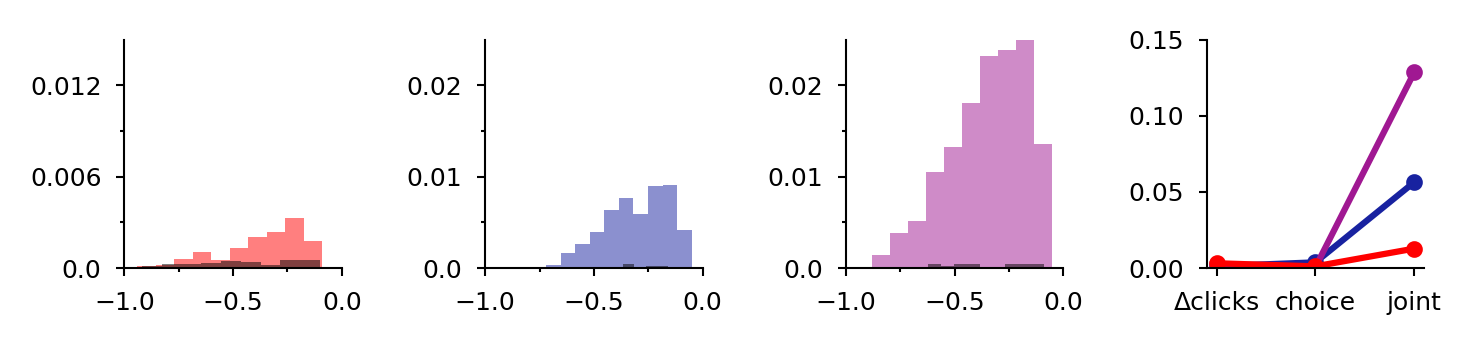

In [96]:
fig, ax = subplots(1, 4, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,4,1)
#hist(vcat(find_diff_joint_FOF...) * dt, alpha=0.5, label="joint", color=mycolors[1])
#hist(vcat(find_diff_neural_FOF...) * dt, alpha=0.5, label="joint", color=mycolors[1])
hist(vcat(diff_T_neural_FOF...) * dt, alpha=0.5, label="joint", color=mycolors[1])
#hist(vcat(find_diff_choice_FOF...) * dt, alpha=0.5, label="choice", color="black");
#hist(vcat(find_diff_LR_FOF...) * dt, alpha=0.5, label="ΔLR", color="black");
hist(vcat(diff_T_LR_FOF...)* dt, alpha=0.5, label="ΔLR", color="black");

yticks([0, 100, 200], [0, round(100/length(ΔLR_FOF), digits=3), 
        round(200/length(ΔLR_FOF), digits=3)])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
#ax.set_title("FOF", fontsize=fs+1)
#ax.set_xlabel("CoM time relative \n to stim. end (s)", fontsize=fs+1)
#ax.set_ylabel("count", fontsize=fs+1)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_ylim(0, 250)
xlim(-1,0)
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
#ax[splt].set_ylim(xc_FOF[1], xc_FOF[end])
#ax[splt].set_ylim(-20,20)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].set_xticks(range(0.25, stop=1., length=4))
#legend(fontsize=3)

subplot(1,4,2)
#hist(vcat(find_diff_joint_PPC...) * dt, alpha=0.5, label="joint", color=mycolors[2])
#hist(vcat(find_diff_neural_PPC...) * dt, alpha=0.5, label="joint", color=mycolors[2])
#hist(vcat(find_diff_choice_PPC...) * dt, alpha=0.5, label="choice", color="black");
#hist(vcat(find_diff_LR_PPC...) * dt, alpha=0.5, label="ΔLR", color="black");

#hist(selected_neural_events_PPC * dt, alpha=0.5, label="joint", color=mycolors[2])
#hist(selected_LR_events_PPC* dt, alpha=0.5, label="choice", color="black");

hist(vcat(diff_T_neural_PPC...) * dt, alpha=0.5, label="joint", color=mycolors[2])
hist(vcat(diff_T_LR_PPC...)* dt, alpha=0.5, label="ΔLR", color="black");

yticks([0, 100, 200], [0, round(100/length(ΔLR_PPC), digits=2), 
        round(200/length(ΔLR_PPC), digits=2)])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
#ax.set_title("PPC", fontsize=fs)
#ax.set_xlabel("CoM time relative \n to stim. end (s)", fontsize=fs)
#ax.set_ylabel("count", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 250)
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)
#ax[splt].set_ylim(xc_FOF[1], xc_FOF[end])
#ax[splt].set_ylim(-20,20)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].set_xticks(range(0.25, stop=1., length=4))
#legend(fontsize=3)

subplot(1,4,3)
#hist(vcat(find_diff_joint_STR...) * dt, alpha=0.5, label="joint", color=mycolors[3])
#hist(vcat(find_diff_neural_STR...) * dt, alpha=0.5, label="joint", color=mycolors[3])
#hist(vcat(find_diff_choice_STR...) * dt, alpha=0.5, label="choice", color="black");
#hist(vcat(find_diff_LR_STR...) * dt, alpha=0.5, label="ΔLR", color="black");

#hist(selected_neural_events_STR * dt, alpha=0.5, label="joint", color=mycolors[3])
#hist(selected_LR_events_STR * dt, alpha=0.5, label="choice", color="black");

hist(vcat(diff_T_neural_STR...) * dt, alpha=0.5, label="joint", color=mycolors[3])
hist(vcat(diff_T_LR_STR...)* dt, alpha=0.5, label="ΔLR", color="black");
yticks([0, 100, 200], [0, round(100/length(ΔLR_STR), digits=2), 
        round(200/length(ΔLR_STR), digits=2)])

#llim, ulim = ylim()
#ulim = 1e3 * round(ulim * 1e-3, digits=0)
#plot(median(vcat(find_diff_joint_STR...) * dt)*ones(100),range(0,stop=ulim,length=100), 
#    color=mycolors[3], LineWidth=1,
#    LineStyle="--")

ax = gca()
#ax.minorticks_on()
ax.xaxis.set_ticks_position("bottom")
#ax.set_title("ADS", fontsize=fs)
#ax.set_xlabel("CoM time relative \n to stim. end (s)", fontsize=fs)
#ax.set_ylabel("count", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)
ax.tick_params(which="major", width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 250)
#ax.tick_params(which="minor", length=0.5)
#ax[splt].set_ylim(xc_FOF[1], xc_FOF[end])
#ax[splt].set_ylim(-20,20)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].set_xticks(range(0.25, stop=1., length=4))
#legend(fontsize=fs+1)

subplot(1,4,4)
plot([1,2,3], [sum(vcat(isevent_PPC_LR...))/length(ΔLR_PPC), 
    sum(vcat(isevent_PPC_choice...))/length(exp_PPC_choice_for),
    sum(vcat(isevent_PPC_neural...))/length(exp_PPC_neural)], color=mycolors[2],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_STR_LR...))/length(ΔLR_STR), 
    sum(vcat(isevent_STR_choice...))/length(exp_STR_choice_for),
    sum(vcat(isevent_STR_neural...))/length(exp_STR_neural)], color=mycolors[3],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_FOF_LR...))/length(ΔLR_FOF), 
        sum(vcat(isevent_FOF_choice...))/length(exp_FOF_choice_for),
    sum(vcat(isevent_FOF_neural...))/length(exp_FOF_neural)], color=mycolors[1],
    marker="o", markersize=3);

ax = gca()
ax.xaxis.set_ticks_position("bottom")
#ax.set_title("change of mind events", fontsize=fs)
#ax.set_xlabel("model", fontsize=fs)
#ax.set_ylabel("frac. trials", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
xticks([1,2,3], ["Δclicks", "choice", "joint"], rotation=0)
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 0.15)
ax.set_yticks(range(0, stop=0.15, length=4), minor=true)
#ax.set_xticks(range(0.25, stop=0.75, length=3))

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4-CoM-hists-v2.pdf")

## Stat test

In [102]:
using HypothesisTests

In [113]:
Int(sum(vcat(isevent_FOF_neural...)))

222

In [114]:
sum(vcat(isevent_PPC_neural...))

509

In [125]:
sum(vcat(isevent_STR_neural...))

1381

In [117]:
length(exp_FOF_neural)

17382

In [119]:
length(exp_PPC_neural)

9037

In [127]:
length(exp_STR_neural)

10760

In [122]:
#FisherExactTest(222, 509, 17382, 9037)
#FisherExactTest(222, 1381, 17382, 10760)
#did in matlab instead!

>> x

x =

         222         509       17382        9037

>> x = [222, 509; 17382, 9037];
>> [h,p,stats] = fishertest(x)

h =

     1


p =

   4.5694e-82


stats = 

             OddsRatio: 0.2268
    ConfidenceInterval: [0.1933 0.2660]

>> x = [222, 1381; 17382, 10760];
>> [h,p,stats] = fishertest(x)

h =

     1


p =

  3.4585e-323


stats = 

             OddsRatio: 0.0995
    ConfidenceInterval: [0.0862 0.1149]

>> 

In [124]:
#FisherExactTest(sum(vcat(isevent_FOF_neural...)), sum(vcat(isevent_PPC_neural...)), 
#   length(exp_FOF_neural), length(exp_PPC_neural))

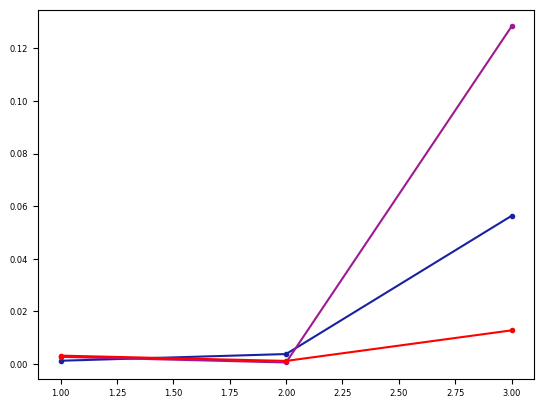

In [97]:
plot([1,2,3], [sum(vcat(isevent_PPC_LR...))/length(ΔLR_PPC), 
    sum(vcat(isevent_PPC_choice...))/length(exp_PPC_choice_for),
    sum(vcat(isevent_PPC_neural...))/length(exp_PPC_neural)], color=mycolors[2],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_STR_LR...))/length(ΔLR_STR), 
    sum(vcat(isevent_STR_choice...))/length(exp_STR_choice_for),
    sum(vcat(isevent_STR_neural...))/length(exp_STR_neural)], color=mycolors[3],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_FOF_LR...))/length(ΔLR_FOF), 
        sum(vcat(isevent_FOF_choice...))/length(exp_FOF_choice_for),
    sum(vcat(isevent_FOF_neural...))/length(exp_FOF_neural)], color=mycolors[1],
    marker="o", markersize=3);

## Cpoke analysis

In [97]:
## number of trials that intersect where it says LR changed mind and neural changed mind

In [98]:
intersect(which_trials_STR_neural[any.(isevent_STR_neural)], which_trials_STR_LR[any.(isevent_STR_LR)])

6-element Array{Int64,1}:
  172
 2606
 3077
 7976
 8911
 9920

In [99]:
intersect(which_trials_PPC_neural[any.(isevent_PPC_neural)], which_trials_PPC_LR[any.(isevent_PPC_LR)])

Int64[]

In [100]:
length(intersect(which_trials_FOF_neural[any.(isevent_FOF_neural)], which_trials_FOF_LR[any.(isevent_FOF_LR)])) / 
    length(which_trials_FOF_neural[any.(isevent_FOF_neural)])

0.013513513513513514

In [101]:
selected_cpokes_FOF = getindex(vcat(vec.(cpoke_out_FOF)...), which_trials_FOF_neural)[any.(isevent_FOF_neural)];

In [102]:
selected_cpokes_PPC = getindex(vcat(vec.(cpoke_out_PPC)...), which_trials_PPC_neural)[any.(isevent_PPC_neural)];

In [103]:
selected_cpokes_STR = getindex(vcat(vec.(cpoke_out_STR)...), which_trials_STR_neural)[any.(isevent_STR_neural)];

In [104]:
using DataFrames, GLM

In [105]:
findall(length.(diff_T_neural_FOF) .> 1)

Int64[]

In [106]:
ols_data_FOF = DataFrame(X=last.(diff_T_neural_FOF)[selected_cpokes_FOF .< 0.5]*dt, 
    Y=selected_cpokes_FOF[selected_cpokes_FOF .< 0.5]);

In [107]:
ols_FOF = lm(@formula(Y ~ X), ols_data_FOF)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.106976    0.0120248   8.90    <1e-15   0.0832753  0.130677
X            -0.0566851   0.0300765  -1.88    0.0608  -0.115966   0.00259593
────────────────────────────────────────────────────────────────────────────

In [108]:
#ols_data_FOF = DataFrame(X1=last.(diff_T_neural_FOF)[selected_cpokes_FOF .< 0.5]*dt, 
#        X2=abs.(last.(getindex(exp_FOF_neural, which_trials_FOF_neural)[any.(isevent_FOF_neural)]))[selected_cpokes_FOF .< 0.5],
#    Y=selected_cpokes_FOF[selected_cpokes_FOF .< 0.5]);

In [109]:
ols_FOF = lm(@formula(Y ~ X1 + X2), ols_data_FOF)

LoadError: [91mtype NamedTuple has no field X1[39m

In [110]:
diff(predict(ols_FOF, DataFrame(X=[-0.55, -0.05])))

1-element Array{Float64,1}:
 -0.028342554692784336

In [111]:
pval = GLM.coeftable(ols_FOF).cols[4][2]

0.06081358833126485

In [112]:
ols_data_PPC = DataFrame(X=last.(diff_T_neural_PPC)[selected_cpokes_PPC .< 0.5]*dt, 
    Y=selected_cpokes_PPC[selected_cpokes_PPC .< 0.5]);
ols_PPC = lm(@formula(Y ~ X), ols_data_PPC)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.14815    0.00823662  17.99    <1e-55  0.131968    0.164333
X            0.0729485  0.0246671    2.96    0.0032  0.0244848   0.121412
─────────────────────────────────────────────────────────────────────────

In [113]:
#ols_data_PPC = DataFrame(X1=last.(diff_T_neural_PPC)[selected_cpokes_PPC .< 0.5]*dt,
#    X2=abs.(last.(getindex(exp_PPC_neural, which_trials_PPC_neural)[any.(isevent_PPC_neural)]))[selected_cpokes_PPC .< 0.5],
#    Y=selected_cpokes_PPC[selected_cpokes_PPC .< 0.5]);
#ols_PPC = lm(@formula(Y ~ X1 + X2), ols_data_PPC)

In [114]:
diff(predict(ols_PPC, DataFrame(X=[-0.55, -0.05])))

1-element Array{Float64,1}:
 0.0364742600025572

In [115]:
pval = GLM.coeftable(ols_PPC).cols[4][2]

0.0032497572034326542

In [116]:
ols_data_STR = DataFrame(X=last.(diff_T_neural_STR)[selected_cpokes_STR .< 0.5] * dt, 
    Y=selected_cpokes_STR[selected_cpokes_STR .< 0.5]);
ols_STR = lm(@formula(Y ~ X), ols_data_STR)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.205731   0.00605512  33.98    <1e-99  0.193852   0.217609
X            0.0526425  0.0157293    3.35    0.0008  0.0217851  0.0834998
─────────────────────────────────────────────────────────────────────────

In [117]:
pval = GLM.coeftable(ols_STR).cols[4][2]

0.0008406877413011016

In [118]:
diff(predict(ols_STR, DataFrame(X=[-0.55, -0.05])))

1-element Array{Float64,1}:
 0.02632123069992895

In [119]:
mean(selected_cpokes_FOF .< 0.5)

0.9819819819819819

In [120]:
mean(selected_cpokes_PPC .< 0.5)

0.9940711462450593

In [121]:
mean(selected_cpokes_STR .< 0.5)

0.9669603524229075

In [122]:
yestrials_FOF = which_trials_FOF_neural[any.(isevent_FOF_neural)];
#notrialsFOF = setdiff(1:length(find_diff_neural_FOF), yestrials_FOF);
notrialsFOF = setdiff(1:length(find_diff_neural_FOF), which_trials_FOF_neural);

In [123]:
length(notrialsFOF)

10300

In [124]:
yestrials_PPC = which_trials_PPC_neural[any.(isevent_PPC_neural)];
#notrialsPPC = setdiff(1:length(find_diff_neural_PPC), yestrials_PPC);
notrialsPPC = setdiff(1:length(find_diff_neural_PPC), which_trials_PPC_neural);

In [125]:
length(notrialsPPC)

5299

In [126]:
yestrials_STR = which_trials_STR_neural[any.(isevent_STR_neural)];
#notrialsSTR = setdiff(1:length(find_diff_neural_STR), yestrials_STR);
notrialsSTR = setdiff(1:length(find_diff_neural_STR), which_trials_STR_neural);

In [127]:
length(notrialsSTR)

5876

In [128]:
mean(vcat(vec.(cpoke_out_PPC)...)[notrialsPPC])

0.14524155123608165

In [129]:
mean(vcat(vec.(cpoke_out_FOF)...)[notrialsFOF])

0.15879876475727875

In [130]:
mean(vcat(vec.(cpoke_out_STR)...)[notrialsSTR])

0.2246277355343832

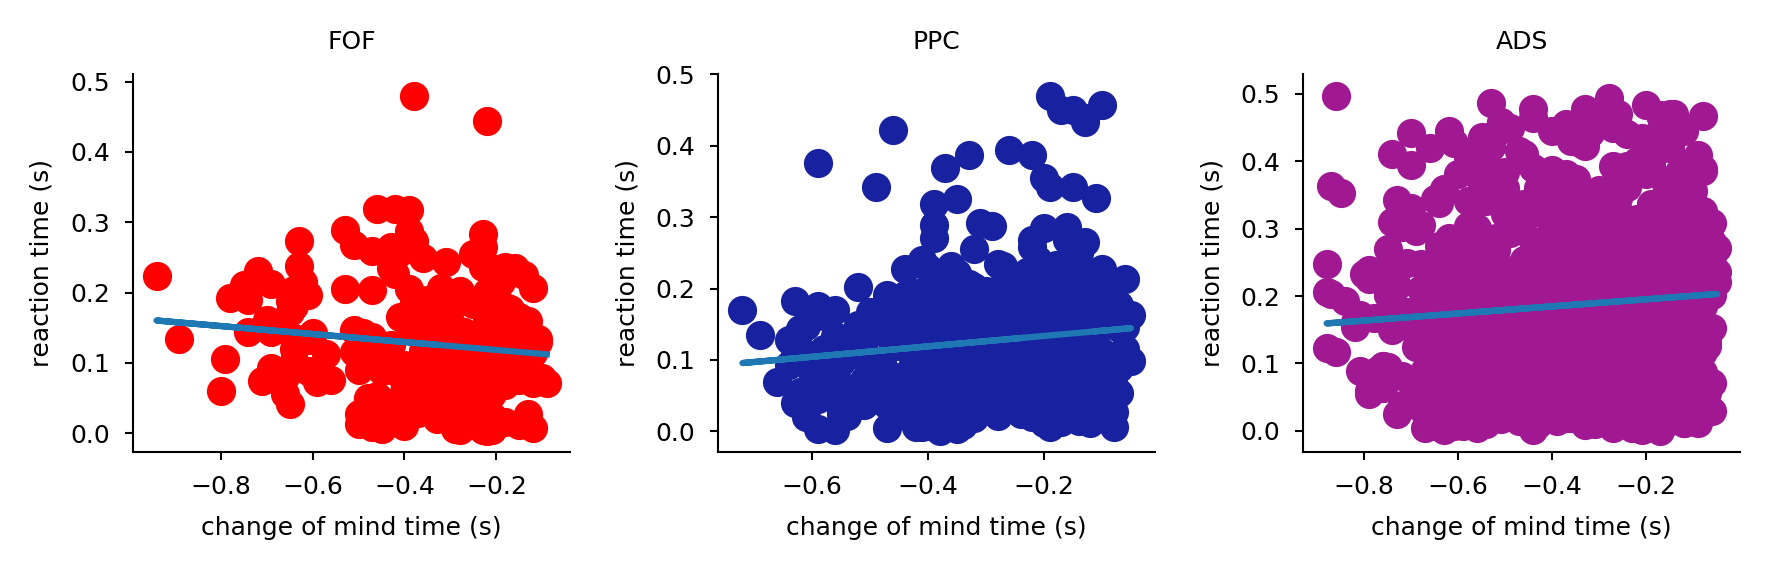

In [131]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
scatter(last.(diff_T_neural_FOF)[selected_cpokes_FOF .< 0.5] * dt, 
    selected_cpokes_FOF[selected_cpokes_FOF .< 0.5], color=mycolors[1])
plot(ols_data_FOF[!, "X"], predict(ols_FOF))

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax.set_ylim(0, 250)
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
scatter(last.(diff_T_neural_PPC)[selected_cpokes_PPC .< 0.5] * dt, selected_cpokes_PPC[selected_cpokes_PPC .< 0.5], color=mycolors[2])
plot(ols_data_PPC[!, "X"], predict(ols_PPC))

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0, 250)
#legend(fontsize=3)

subplot(1,3,3)
scatter(last.(diff_T_neural_STR)[selected_cpokes_STR .< 0.5] * dt, 
    selected_cpokes_STR[selected_cpokes_STR .< 0.5], color=mycolors[3])
plot(ols_data_STR[!, "X"], predict(ols_STR))

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0, 250)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

In [132]:
using CategoricalArrays

In [133]:
labels = string.(1:10);

In [134]:
ys_PPC = map(x-> mean(vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [135]:
LR_PPC = map(x-> mean(last.(ΔLR_PPC)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [136]:
xs_PPC = map(x-> mean(last.(diff_T_neural_PPC)[cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [137]:
ys_FOF = map(x-> mean(vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

xs_FOF = map(x-> mean(last.(diff_T_neural_FOF)[cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

In [138]:
LR_FOF = map(x-> mean(last.(ΔLR_FOF)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

In [139]:
LR_STR = map(x-> mean(last.(ΔLR_STR)[yestrials_STR][cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);

In [140]:
ys_STR = map(x-> mean(vcat(vec.(cpoke_out_STR)...)[yestrials_STR][cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);
xs_STR = map(x-> mean(last.(diff_T_neural_STR)[cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);

In [141]:
length(yestrials_STR)

1362

In [142]:
length(yestrials_FOF)

222

In [143]:
length(yestrials_PPC)

506

In [144]:
ols_data_FOF_2 = DataFrame(X=xs_FOF*dt, Y=ys_FOF);
ols_FOF_2 = lm(@formula(Y ~ X), ols_data_FOF_2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0974095   0.0137418   7.09    0.0001   0.0657208   0.129098
X            -0.114851    0.0339204  -3.39    0.0096  -0.193071   -0.0366303
────────────────────────────────────────────────────────────────────────────

In [145]:
ols_data_PPC_2 = DataFrame(X=xs_PPC*dt, Y=ys_PPC);
ols_PPC_2 = lm(@formula(Y ~ X), ols_data_PPC_2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.151878   0.00940976  16.14    <1e-6   0.130179     0.173577
X            0.0715719  0.0278086    2.57    0.0329  0.00744509   0.135699
──────────────────────────────────────────────────────────────────────────

In [146]:
ols_data_STR_2 = DataFrame(X=xs_STR*dt, Y=ys_STR);
ols_STR_2 = lm(@formula(Y ~ X), ols_data_STR_2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.217679   0.00800117  27.21    <1e-8    0.199229    0.23613
X            0.0420753  0.0206229    2.04    0.0756  -0.00548126  0.0896319
───────────────────────────────────────────────────────────────────────────

### COM vs. mag of posterior

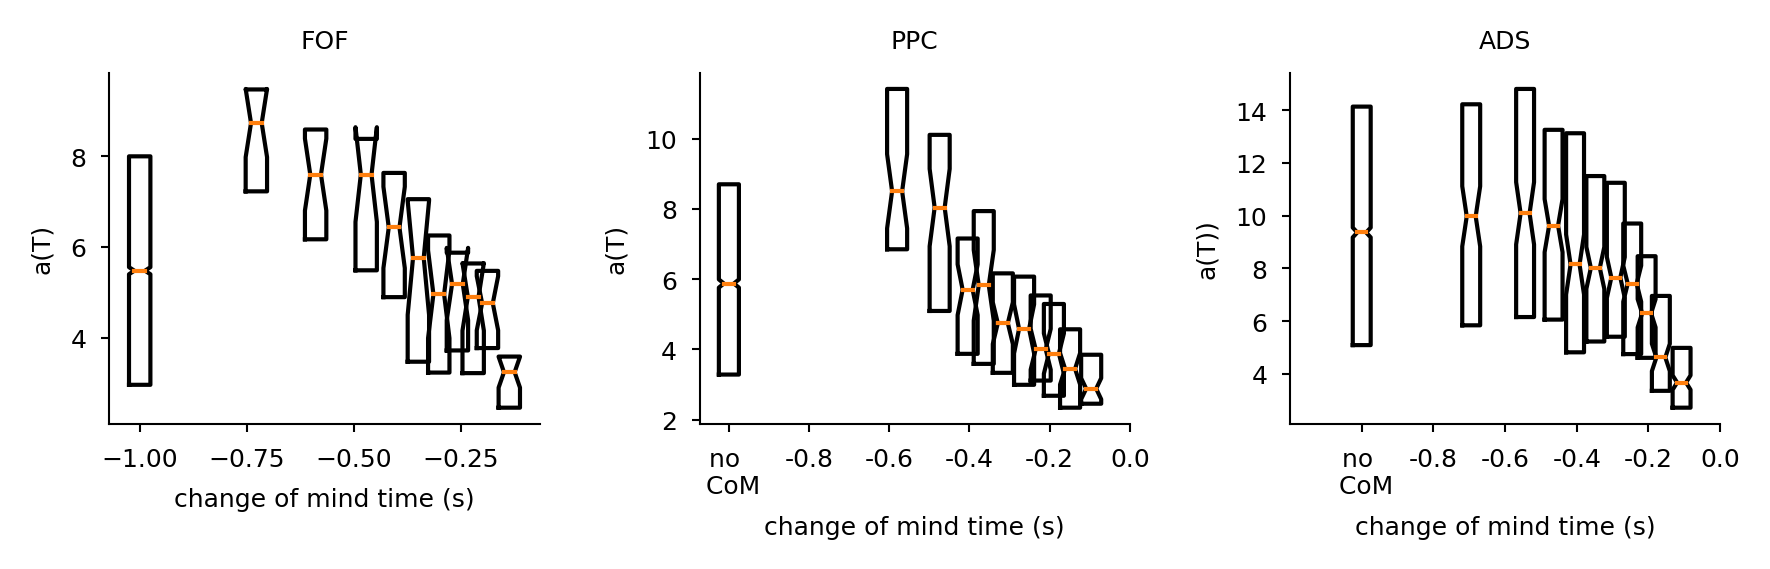

In [147]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
boxplot(vcat([abs.(last.(exp_FOF_neural))[notrialsFOF]], 
        map(x-> (abs.(last.(exp_FOF_neural))[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_FOF*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax.set_ylim(0.0, 0.3)
#xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
#plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
boxplot(vcat([abs.(last.(exp_PPC_neural))[notrialsPPC]], 
        map(x-> (abs.(last.(exp_PPC_neural))[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_PPC*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

subplot(1,3,3)
#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
boxplot(vcat([abs.(last.(exp_STR_neural))[notrialsSTR]], 
        map(x-> (abs.(last.(exp_STR_neural))[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_STR*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
#plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T))", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

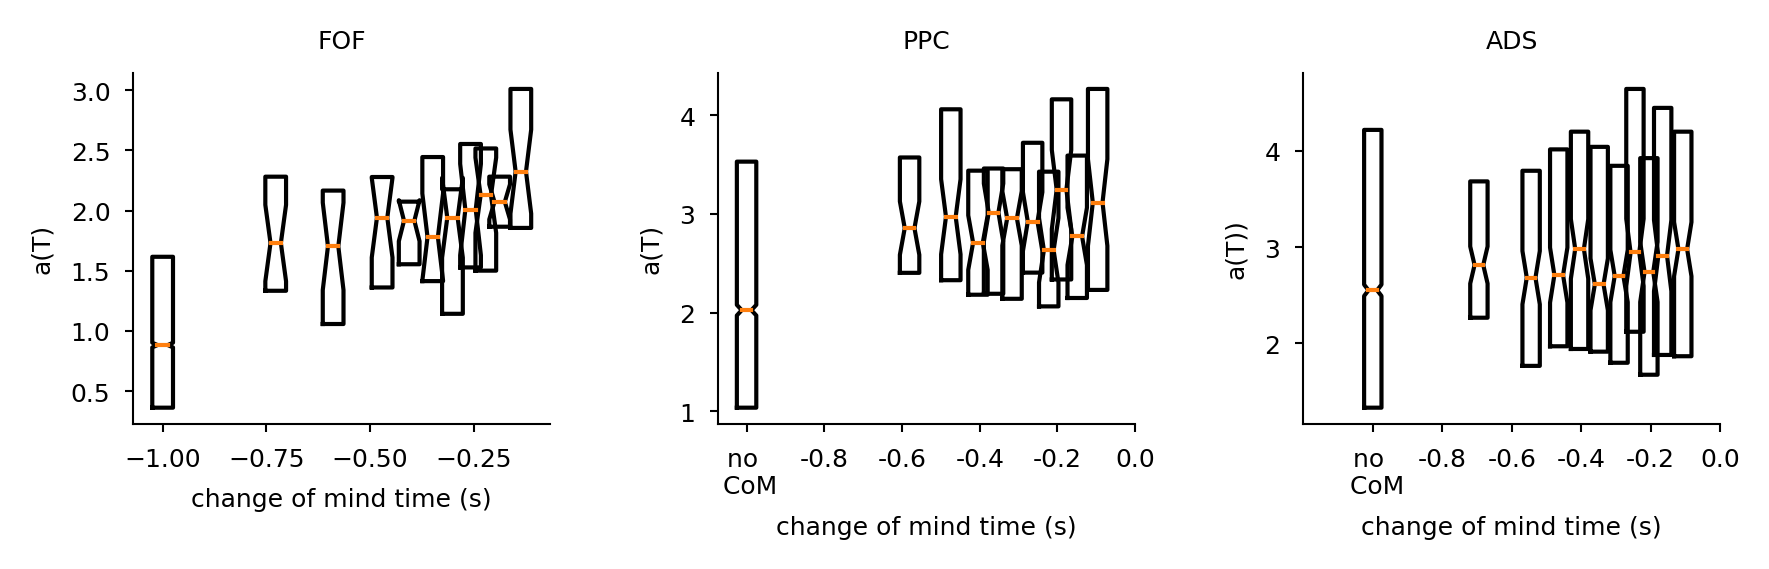

In [148]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
boxplot(vcat([abs.(first.(exp_FOF_neural))[notrialsFOF]], 
        map(x-> (abs.(first.(exp_FOF_neural))[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_FOF*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax.set_ylim(0.0, 0.3)
#xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
#plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
boxplot(vcat([abs.(first.(exp_PPC_neural))[notrialsPPC]], 
        map(x-> (abs.(first.(exp_PPC_neural))[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_PPC*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

subplot(1,3,3)
#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
boxplot(vcat([abs.(first.(exp_STR_neural))[notrialsSTR]], 
        map(x-> (abs.(first.(exp_STR_neural))[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_STR*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
#plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T))", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

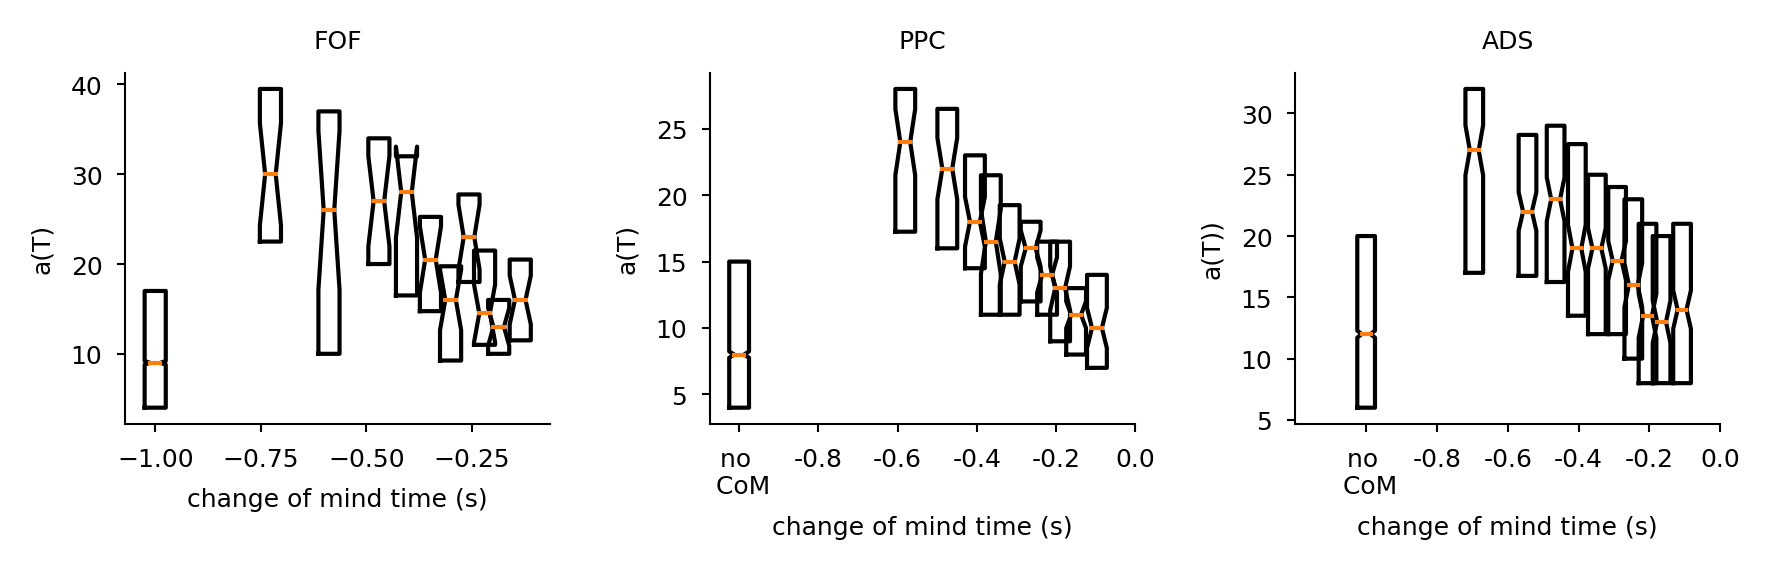

In [149]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
boxplot(vcat([abs.(last.(ΔLR_FOF))[notrialsFOF]], 
        map(x-> (abs.(last.(ΔLR_FOF))[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_FOF*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax.set_ylim(0.0, 0.3)
#xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
#plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
boxplot(vcat([abs.(last.(ΔLR_PPC))[notrialsPPC]], 
        map(x-> (abs.(last.(ΔLR_PPC))[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_PPC*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

subplot(1,3,3)
#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
boxplot(vcat([abs.(last.(ΔLR_STR))[notrialsSTR]], 
        map(x-> (abs.(last.(ΔLR_STR))[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_STR*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
#plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("a(T))", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

In [150]:
#is posterior on CoM trials just larger at beginning of trial?

## CoM linear regress vs boxplots

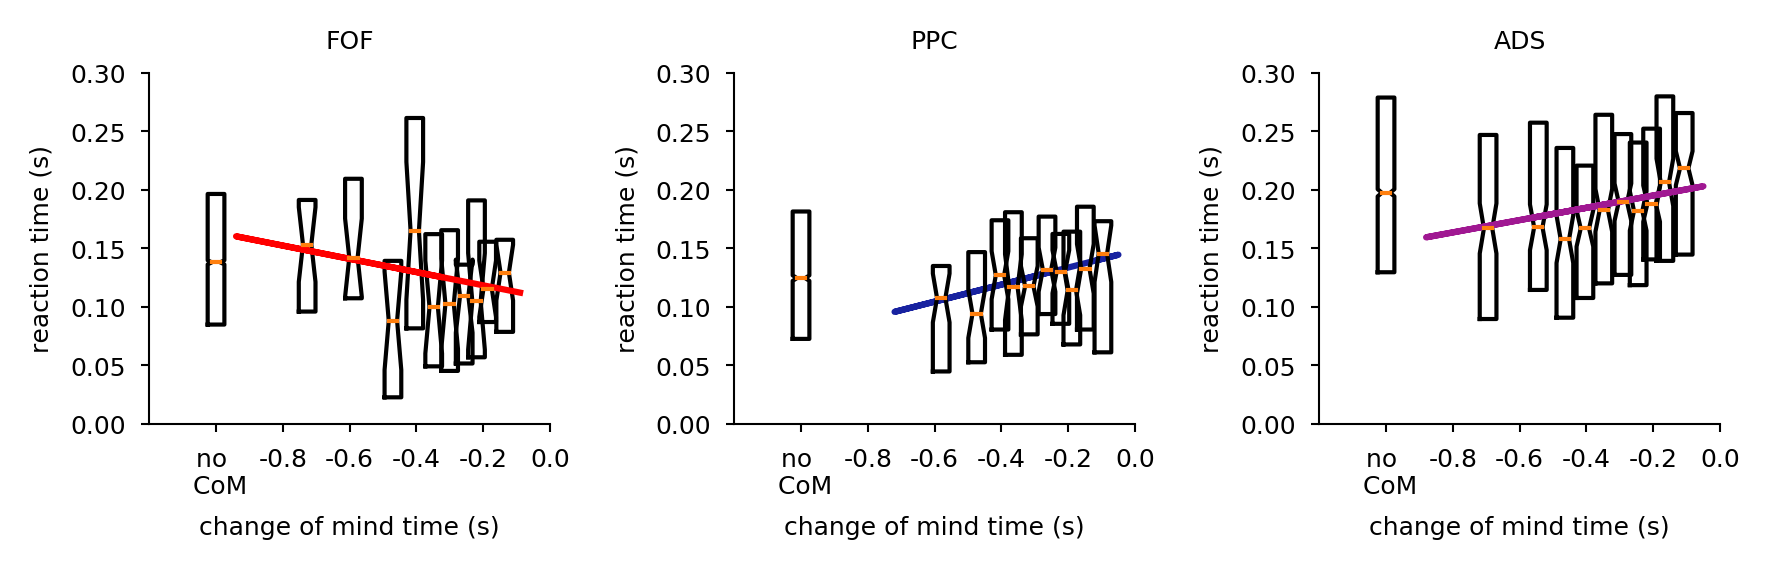

In [151]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
boxplot(vcat([vcat(vec.(cpoke_out_FOF)...)[notrialsFOF]], 
        map(x-> (vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_FOF*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
boxplot(vcat([vcat(vec.(cpoke_out_PPC)...)[notrialsPPC]], 
        map(x-> (vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_PPC*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

subplot(1,3,3)
#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
boxplot(vcat([vcat(vec.(cpoke_out_STR)...)[notrialsSTR]], 
        map(x-> (vcat(vec.(cpoke_out_STR)...)[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_STR*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

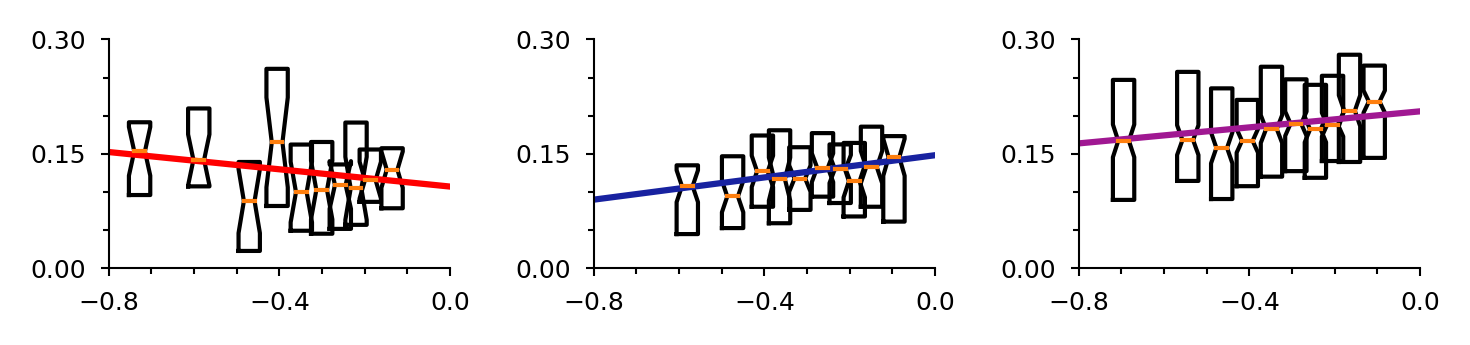

In [152]:
fig, ax = subplots(1, 3, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

ax[1].boxplot(map(x-> (vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels), positions=xs_FOF*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
#ax[1].plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
ax[1].plot(range(-0.8, stop=0, length=100), 
    predict(ols_FOF, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax[1].xaxis.set_ticks_position("bottom")
#ax.set_title("FOF", fontsize=fs)
#ax.set_xlabel("change of mind time (s)", fontsize=fs)
#ax.set_ylabel("reaction time (s)", fontsize=fs)
ax[1].xaxis.set_ticks_position("bottom")
ax[1].spines["right"].set_visible(false)
ax[1].spines["top"].set_visible(false)
ax[1].spines["bottom"].set_linewidth(0.5)
ax[1].spines["left"].set_linewidth(0.5)
ax[1].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[1].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[1].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[1].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[1].tick_params(width=0.5, length=2)
ax[1].tick_params(which="minor", width=0.5, length=1.5)
ax[1].set_xlim(-0.8, 0.0)
#legend(fontsize=3)

#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
#ax[2].plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
ax[2].boxplot(map(x-> (vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels), positions=xs_PPC*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
ax[2].plot(range(-0.8, stop=0, length=100), 
    predict(ols_PPC, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[2])

ax[2].xaxis.set_ticks_position("bottom")
#ax.set_title("PPC", fontsize=fs)
#ax.set_xlabel("change of mind time (s)", fontsize=fs)
#ax.set_ylabel("reaction time (s)", fontsize=fs)
ax[2].xaxis.set_ticks_position("bottom")
ax[2].spines["right"].set_visible(false)
ax[2].spines["top"].set_visible(false)
ax[2].spines["bottom"].set_linewidth(0.5)
ax[2].spines["left"].set_linewidth(0.5)
#ax.set_ylim(0.0, 0.3)
#xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
#ax.set_xlim(-0.8, 0.0)
ax[2].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[2].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[2].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[2].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[2].tick_params(width=0.5, length=2)
ax[2].tick_params(which="minor", width=0.5, length=1.5)
ax[2].set_xlim(-0.8, 0.0)

#legend(fontsize=3)

#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
ax[3].boxplot(map(x-> (vcat(vec.(cpoke_out_STR)...)[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels), positions=xs_STR*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
#ax[3].plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])
ax[3].plot(range(-0.8, stop=0, length=100), 
    predict(ols_STR, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[3])

ax[3].xaxis.set_ticks_position("bottom")
#ax.set_title("ADS", fontsize=fs)
#ax.set_xlabel("change of mind time (s)", fontsize=fs)
#ax.set_ylabel("reaction time (s)", fontsize=fs)
ax[3].xaxis.set_ticks_position("bottom")
ax[3].spines["right"].set_visible(false)
ax[3].spines["top"].set_visible(false)
ax[3].spines["bottom"].set_linewidth(0.5)
ax[3].spines["left"].set_linewidth(0.5)
ax[3].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[3].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[3].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[3].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[3].tick_params(width=0.5, length=2)
ax[3].tick_params(which="minor", width=0.5, length=1.5)
ax[3].set_xlim(-0.8, 0.0)

tight_layout()

PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4-CoM-times-v2.pdf")

In [153]:
labels=string.(1:5);

In [154]:
xs_FOF = map(x-> mean(last.(diff_T_neural_FOF)[cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);
xs_PPC = map(x-> mean(last.(diff_T_neural_PPC)[cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);
xs_STR = map(x-> mean(last.(diff_T_neural_STR)[cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);

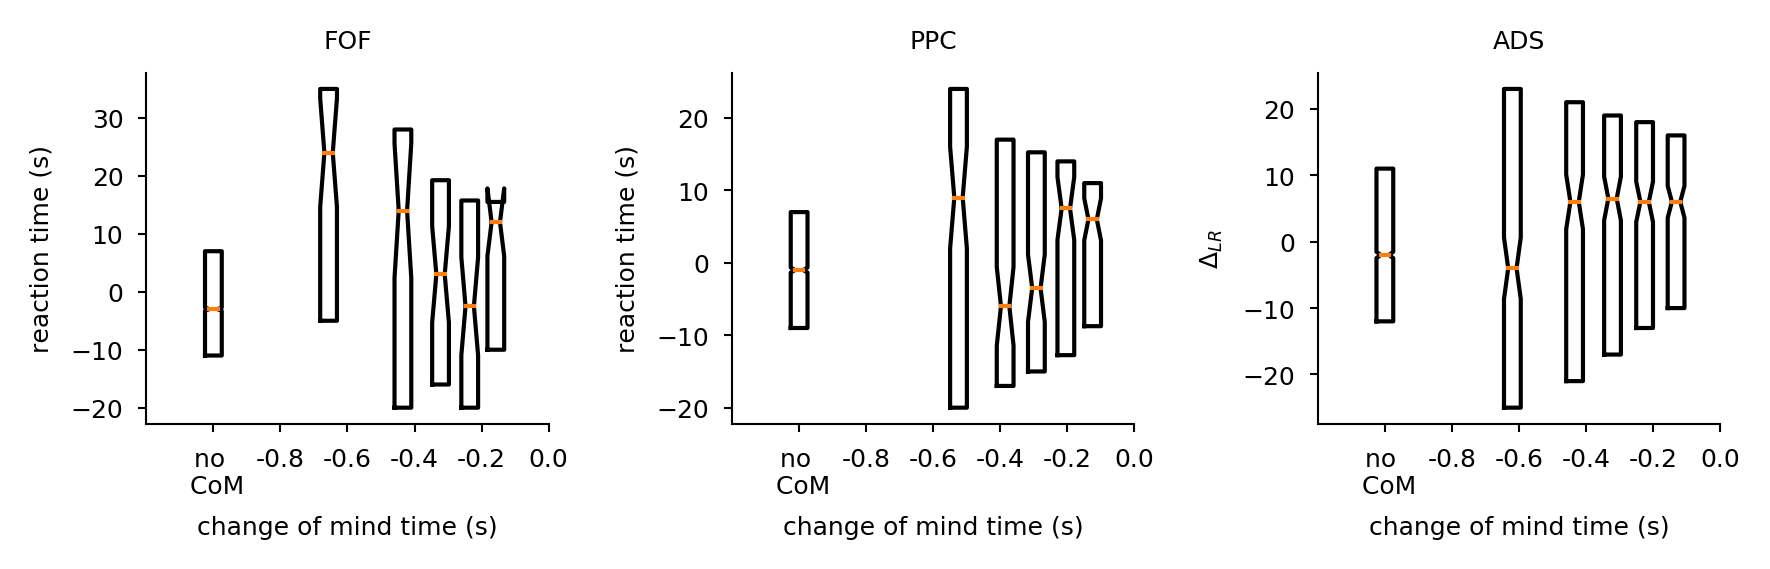

In [155]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
boxplot(vcat([last.(ΔLR_FOF)[notrialsFOF]], 
        map(x-> (last.(ΔLR_FOF)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_FOF*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

#plot(xs_FOF*dt, ys_FOF, "x", color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])
#plot(ols_data_FOF[!, "X"], predict(ols_FOF), color=mycolors[1])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#    string.(range(-0.8, stop=0, length=5)))
ax.tick_params(width=0.5, length=2)
#legend(fontsize=3)

subplot(1,3,2)
#plot(xs_PPC*dt, ys_PPC, "x", color=mycolors[2])
#plot(ols_data_PPC[!, "X"], predict(ols_PPC), color=mycolors[2])
boxplot(vcat([last.(ΔLR_PPC)[notrialsPPC]], 
        map(x-> (last.(ΔLR_PPC)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_PPC*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel("reaction time (s)", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_xticks(range(-0.8, stop=0, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

subplot(1,3,3)
#plot(xs_STR*dt, ys_STR, "x", color=mycolors[3])
#plot(ols_data_STR[!, "X"], predict(ols_STR), color=mycolors[3])
boxplot(vcat([last.(ΔLR_STR)[notrialsSTR]], 
        map(x-> (last.(ΔLR_STR)[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels)), positions=vcat(-1, xs_STR*dt), 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("change of mind time (s)", fontsize=fs)
ax.set_ylabel(L"\Delta_{LR}", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
#ax.set_ylim(0.0, 0.3)
xticks(range(-1.0, stop=0, length=6), vcat("no \n CoM", string.(range(-0.8, stop=0, length=5))), rotation=0)
ax.set_xlim(-1.2, 0.0)
#legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

In [156]:
ols_STR

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.205731   0.00605512  33.98    <1e-99  0.193852   0.217609
X            0.0526425  0.0157293    3.35    0.0008  0.0217851  0.0834998
─────────────────────────────────────────────────────────────────────────

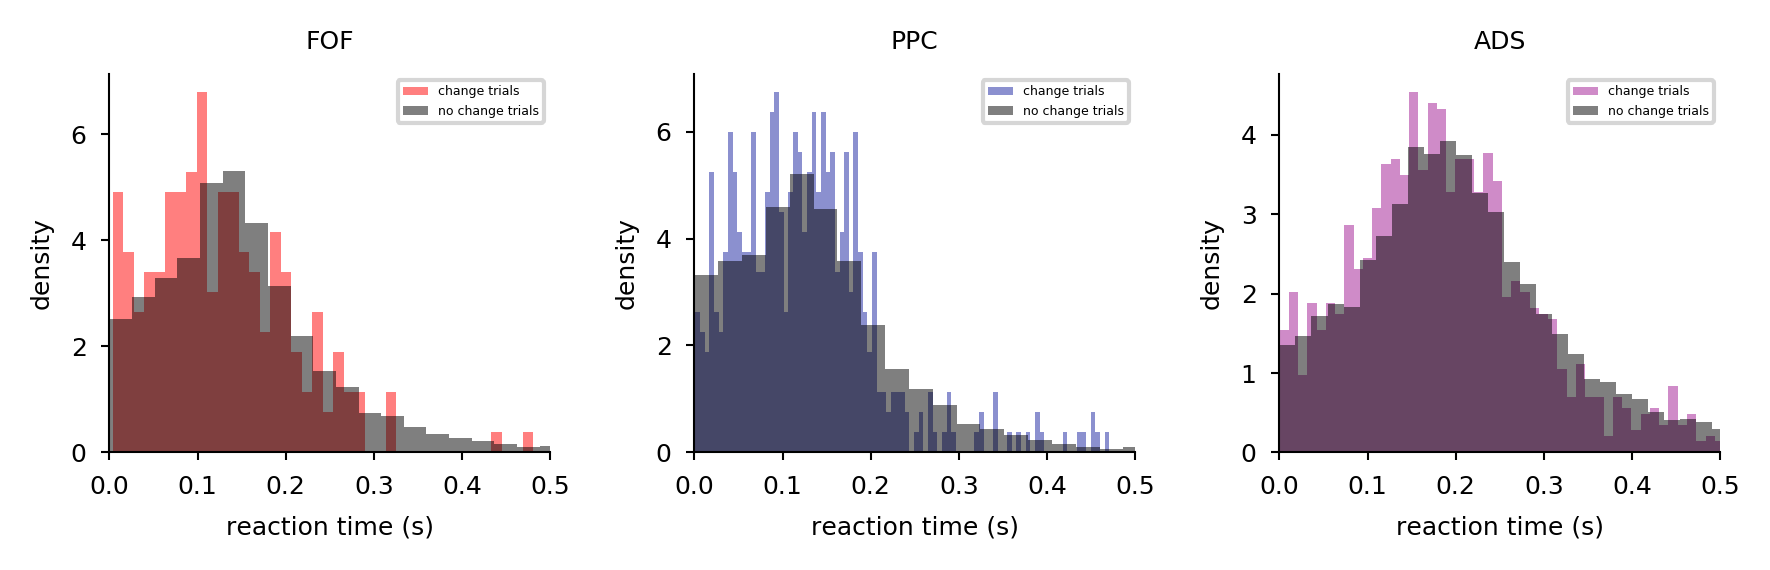

In [157]:
fig, ax = subplots(1, 4, figsize=(6, 2), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,3,1)
hist(vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF], 100;  density=true, alpha=0.5, label="change trials", color=mycolors[1])
hist(vcat(vec.(cpoke_out_FOF)...)[notrialsFOF], 200;  density=true, alpha=0.5, label="no change trials", color="black")

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("FOF", fontsize=fs)
ax.set_xlabel("reaction time (s)", fontsize=fs)
ax.set_ylabel("density", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_xlim(0.0, 0.5)
ax.tick_params(width=0.5, length=2)
legend(fontsize=3)

subplot(1,3,2)
hist(vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC], 200;  density=true, alpha=0.5, label="change trials", color=mycolors[2])
hist(vcat(vec.(cpoke_out_PPC)...)[notrialsPPC], 200;  density=true, alpha=0.5, label="no change trials", color="black")

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("PPC", fontsize=fs)
ax.set_xlabel("reaction time (s)", fontsize=fs)
ax.set_ylabel("density", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
ax.set_xlim(0.0, 0.5)
legend(fontsize=3)

subplot(1,3,3)
hist(vcat(vec.(cpoke_out_STR)...)[yestrials_STR], 100;  density=true, alpha=0.5, label="change trials", color=mycolors[3])
hist(vcat(vec.(cpoke_out_STR)...)[notrialsSTR], 200;  density=true, alpha=0.5, label="no change trials", color="black")

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.set_title("ADS", fontsize=fs)
ax.set_xlabel("reaction time (s)", fontsize=fs)
ax.set_ylabel("density", fontsize=fs)
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
ax.tick_params(width=0.5, length=2)
ax.set_xlim(0.0, 0.5)
legend(fontsize=3)

tight_layout()

#PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4D-FORWARD.pdf")

## Show nice change of mind events

In [158]:
FOF_switches = which_trials_FOF_neural[any.(isevent_FOF_neural)];
PPC_switches = which_trials_PPC_neural[any.(isevent_PPC_neural)];
STR_switches = which_trials_STR_neural[any.(isevent_STR_neural)];

In [305]:
FOF_switches

222-element Array{Int64,1}:
    77
   667
   677
   690
   752
   760
   789
   826
   834
   849
   981
   996
  1036
     ⋮
 16337
 16354
 16368
 16375
 16411
 16476
 16603
 16790
 17039
 17153
 17287
 17298

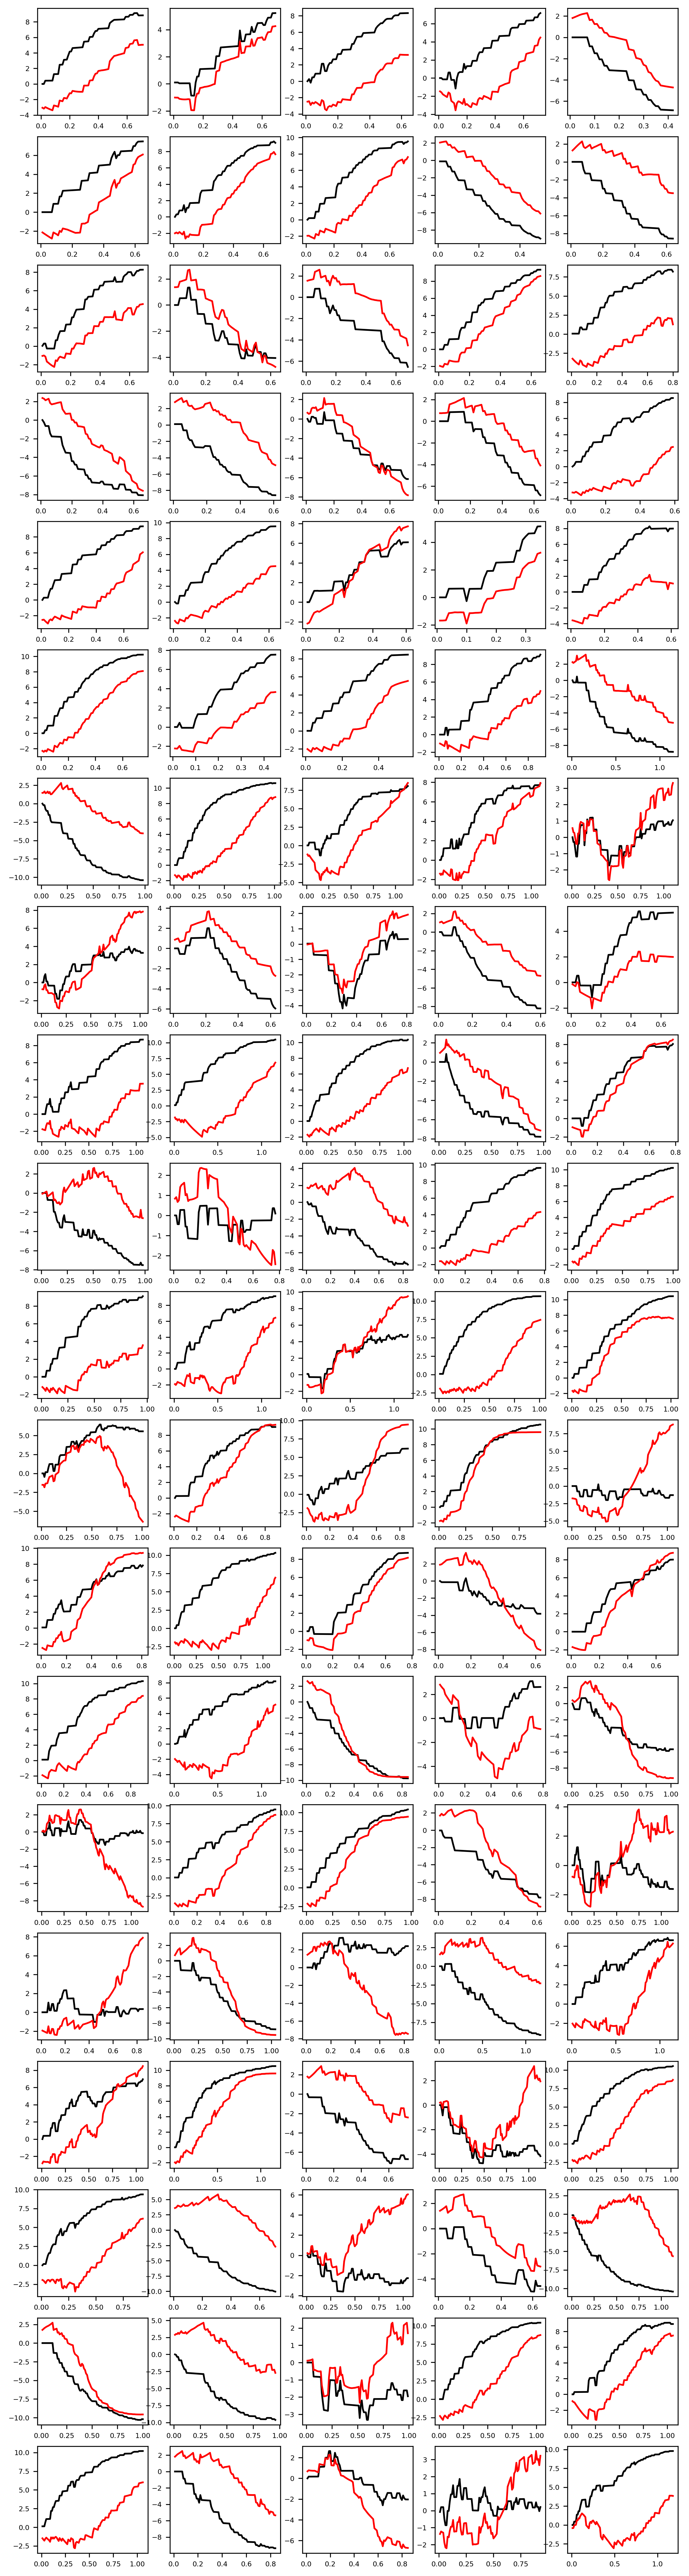

In [306]:
fig, ax = subplots(5, 20, figsize=(10, 40), dpi=300, frameon=true)

for i = 1:100
    subplot(20,5,i)
    tri = FOF_switches[i+100]
    T = length(exp_FOF_neural[tri])
    plot(collect(1:T)*dt, exp_FOF_choice_for[tri], color="black", label="choice")
    plot(collect(1:T)*dt, exp_FOF_neural[tri], color=mycolors[1], label="neural/choice")
end

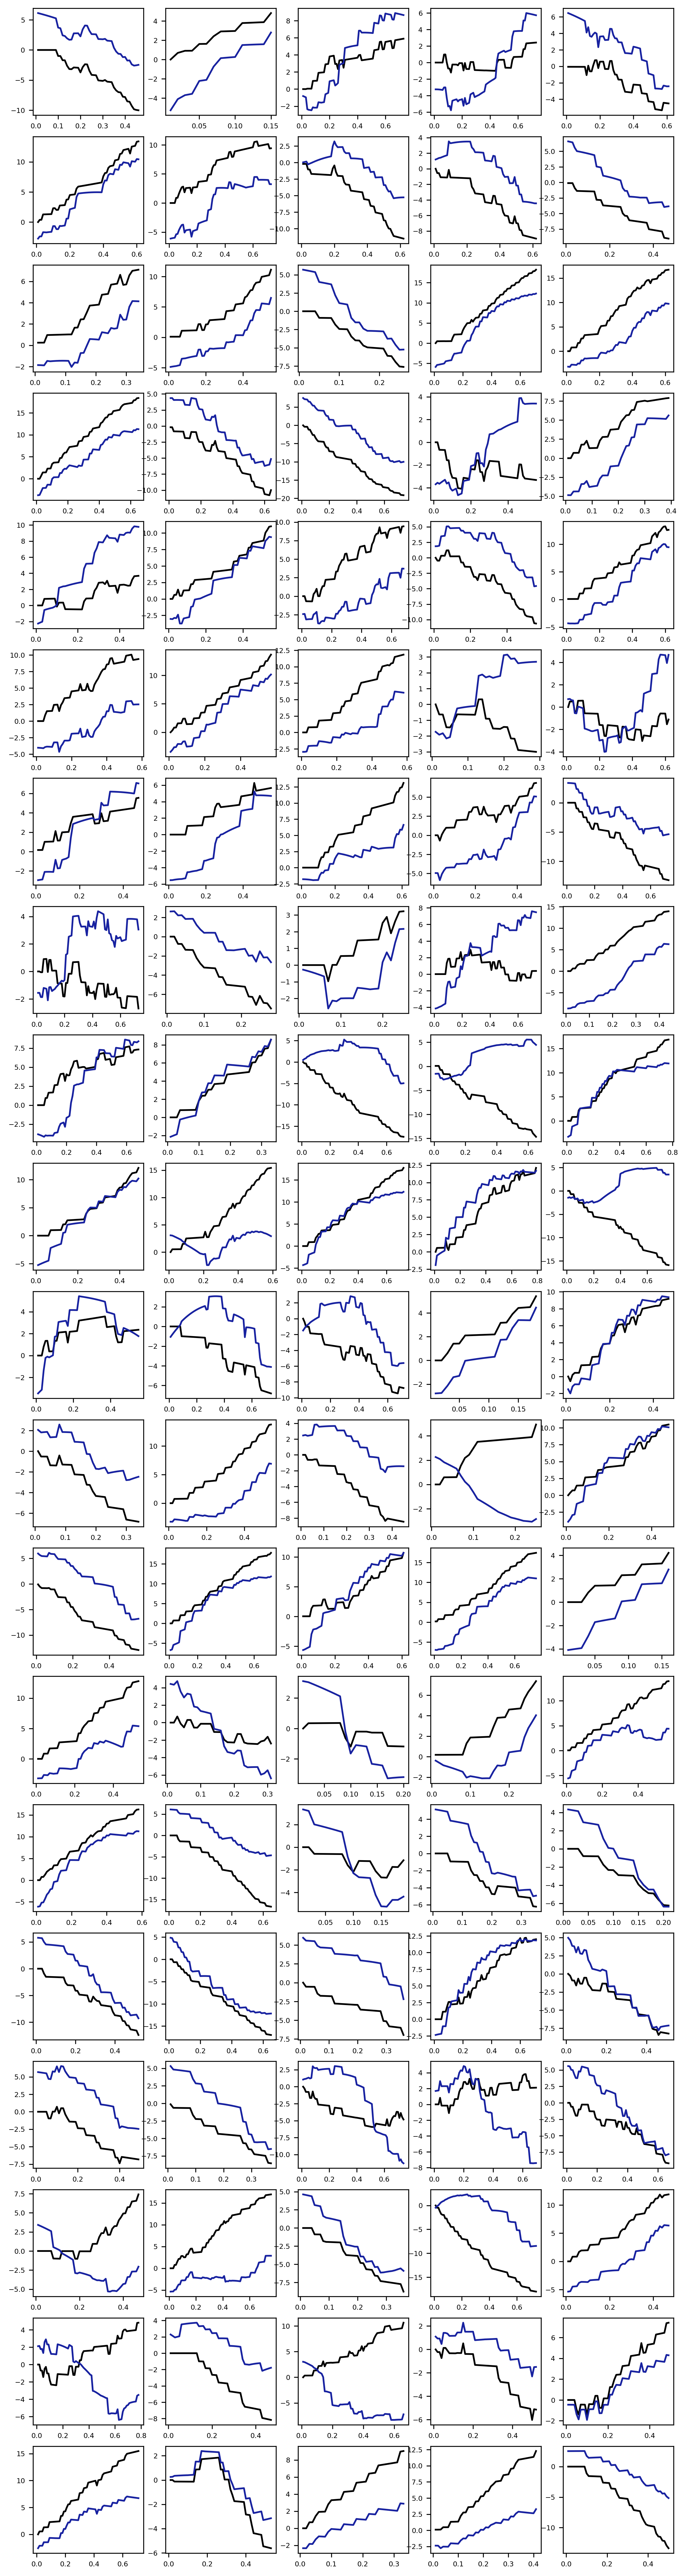

In [293]:
fig, ax = subplots(5, 20, figsize=(10, 40), dpi=300, frameon=true)

for i = 201:300
    subplot(20,5,mod(i-1,100)+1)
    tri = PPC_switches[i]
    T = length(exp_PPC_neural[tri])
    plot(collect(1:T)*dt, exp_PPC_choice_for[tri], color="black", label="choice")
    plot(collect(1:T)*dt, exp_PPC_neural[tri], color=mycolors[2], label="neural/choice")
end

In [299]:
findall(FOF_switches .== 6571)

Int64[]

In [301]:
findall(PPC_switches .== 5581)

1-element Array{Int64,1}:
 250

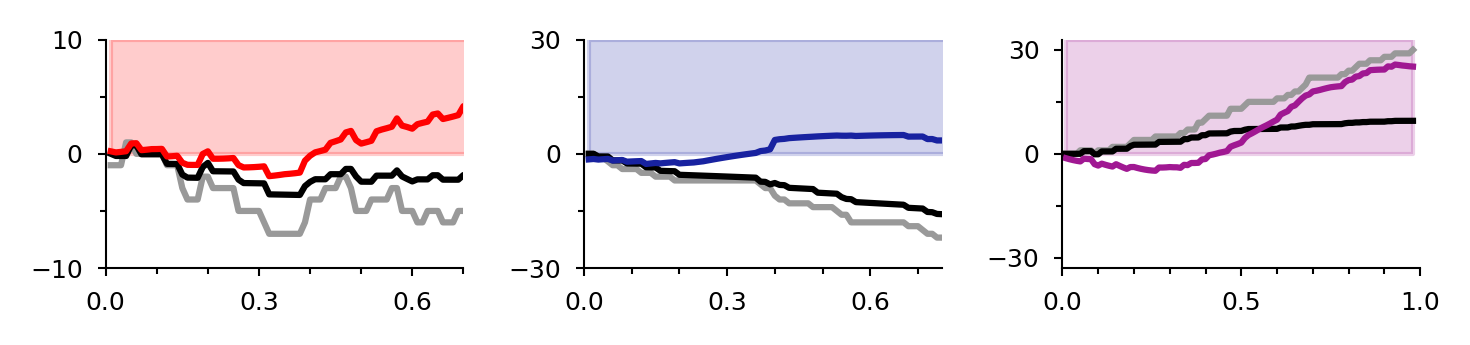

In [310]:
fig, ax = subplots(1, 3, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

tri = FOF_switches[188]
#tri = 16129
T = length(exp_FOF_neural[tri])

splt = 1
ax[splt].plot(collect(1:T)*dt, ΔLR_FOF[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_FOF_choice_for[tri], color="black", label="choice")
#ax[splt].plot(collect(1:T)*dt, exp_FOF_joint_for[tri], color=mycolors[1], label="joint")
ax[splt].plot(collect(1:T)*dt, exp_FOF_neural[tri], color=mycolors[1], label="joint", LineStyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    10 * (2 * choice_data_FOF[tri].choice - 1) * ones(T), zeros(T),
    alpha=0.2, color=mycolors[1]) 

#ax[splt].xaxis.set_ticks_position("bottom")
#ax[splt].set_title("FOF", fontsize=fs)
#ax[splt].set_xlabel("time (s)", fontsize=fs)
#ax[splt].set_ylabel("a", fontsize=fs)
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)

#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].tick_params(width=0.5, length=2)
#ax[splt].set_ylim(xc_FOF[1], xc_FOF[end])
#ax[splt].set_ylim(-20,20)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].set_xticks(range(0.25, stop=1., length=4))
#ax[splt].legend(fontsize=3)

ax[splt].set_xticks(range(0., stop=0.6, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=0.8, length=9), minor=true)
ax[splt].set_yticks(range(-10, stop=10, length=3), minor=false)
ax[splt].set_yticks(range(-10, stop=10, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-10,10)
ax[splt].set_xlim(0,0.7)

#tri = PPC_switches[299]
tri = PPC_switches[250]
T = length(exp_PPC_neural[tri])

splt = 2
ax[splt].plot(collect(1:T)*dt, ΔLR_PPC[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_PPC_choice_for[tri], color="black", label="choice")
#ax[splt].plot(collect(1:T)*dt, exp_PPC_joint_for[tri], color=mycolors[2], label="joint")
ax[splt].plot(collect(1:T)*dt, exp_PPC_neural[tri], color=mycolors[2], label="joint", LineStyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    30 * (2 * choice_data_PPC[tri].choice - 1) * ones(T), zeros(T),
    alpha=0.2, color=mycolors[2]) 

ax[splt].xaxis.set_ticks_position("bottom")
#ax[splt].set_title("PPC", fontsize=fs)
#ax[splt].set_xlabel("time (s)", fontsize=fs)
#ax[splt].set_ylabel("a", fontsize=fs)
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
#ax[splt].set_yticks(range(-20, stop=20, length=5))
#ax[splt].tick_params(width=0.5, length=2)
#ax[splt].set_ylim(xc_PPC[1], xc_PPC[end])
#ax[splt].set_ylim(-30,30)
#ax[splt].set_yticks(range(-30, stop=30, length=5))
#ax[splt].set_xticks(range(0.25, stop=0.75, length=3))
#ax[splt].legend(fontsize=3)

ax[splt].set_xticks(range(0., stop=0.6, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=0.8, length=9), minor=true)
ax[splt].set_yticks(range(-30, stop=30, length=3), minor=false)
ax[splt].set_yticks(range(-30, stop=30, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-30,30)
ax[splt].set_xlim(0,0.75)


#tri = 5096
tri = 67
T = length(exp_STR_neural[tri])

splt = 3
ax[splt].plot(collect(1:T)*dt, ΔLR_STR[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_STR_choice_for[tri],  color="black", label="choice")
#ax[splt].plot(collect(1:T)*dt, exp_STR_joint_for[tri], color=mycolors[3], label="joint")
ax[splt].plot(collect(1:T)*dt, exp_STR_neural[tri], color=mycolors[3], label="joint", LineStyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    33 * ones(T), zeros(T),
    alpha=0.2, color=mycolors[3]) 

ax[splt].xaxis.set_ticks_position("bottom")
#ax[splt].set_title("ADS", fontsize=fs)
#ax[splt].set_xlabel("time (s)", fontsize=fs)
#ax[splt].set_ylabel("a", fontsize=fs)
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)


#ax[splt].set_yticks(range(-40, stop=40, length=5))
#ax[splt].tick_params(width=0.5, length=2)
#ax[splt].set_ylim(xc_STR[1], xc_STR[end])
#ax[splt].set_ylim(-30,30)
#ax[splt].set_yticks(range(-30, stop=30, length=5))
#ax[splt].set_xticks(range(0.25, stop=0.75, length=3))

ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=1.0, length=11), minor=true)
ax[splt].set_yticks(range(-30, stop=30, length=3), minor=false)
ax[splt].set_yticks(range(-30, stop=30, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-33,33)
ax[splt].set_xlim(0,1.)

tight_layout()
#ax[splt].legend(fontsize=3)

PyPlot.savefig(ENV["HOME"]*"/Projects/briandepasquale/bdd_work/figures/paper/Fig4/Fig-4-CoM-examples-v2.pdf")

## Error trials